In [3]:
!pip install qiskit
!pip install qiskit --quiet
!pip install qiskit-aer --quiet
!pip install pylatexenc --quiet
!pip install qiskit-machine-learning --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 11.2 MB/s eta 0:00:00


In [10]:
# Install necessary packages (if not installed)
!pip install qiskit qiskit-machine-learning matplotlib --quiet

# Imports
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# Ensure inline plotting (for Jupyter/Colab)
%matplotlib inline

# Step 1: Define a parameterized feature map (2 qubits)
feature_map = TwoLocal(
    num_qubits=2,
    rotation_blocks='ry',
    entanglement_blocks='cz',
    reps=1
)

# Step 2: Define the SamplerQNN
sampler = StatevectorSampler()
qnn = SamplerQNN(
    circuit=feature_map,
    sampler=sampler,
    input_params=feature_map.parameters,  # Input features
    weight_params=[],                     # No trainable weights for now
)

# Step 3: Provide sample input values
num_inputs = len(feature_map.parameters)
x_input = np.random.rand(num_inputs) * 2 * np.pi  # Random values in [0, 2π]

# Step 4: Evaluate the QNN output
output = qnn.forward(x_input, weights=np.array([]))
print("Input values for QNN (radians):")
print(x_input)
print("\nQuantum Neural Network output (probabilities):")
print(output)

# Step 5: Convert probabilities to counts for histogram
probs = np.real(output[0])
probs /= np.sum(probs)  # ensure normalization

shots = 1024  # number of simulated measurements
counts = (probs * shots).astype(int)  # convert probabilities to counts

states = [format(i, f"0{feature_map.num_qubits}b") for i in range(len(counts))]
counts_dict = dict(zip(states, counts))

# Step 6: Plot histogram
fig = plot_histogram(counts_dict)
fig.suptitle("QNN Output Probabilities for Input Vector")
plt.show(fig)


Input values for QNN (radians):
[3.91240939 1.64121513 2.87348018 6.07730044]

Quantum Neural Network output (probabilities):
[[0.35351562 0.04589844 0.49316406 0.10742188]]


In [11]:
# Install necessary packages
!pip install qiskit qiskit-machine-learning matplotlib --quiet

# Imports
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# Ensure inline plotting (for Jupyter/Colab)
%matplotlib inline

# Step 1: Define a parameterized feature map (2 qubits)
feature_map = TwoLocal(
    num_qubits=2,
    rotation_blocks='ry',
    entanglement_blocks='cz',
    reps=1
)

# Step 2: Define the SamplerQNN
sampler = StatevectorSampler()
qnn = SamplerQNN(
    circuit=feature_map,
    sampler=sampler,
    input_params=feature_map.parameters,  # Input features
    weight_params=[],                     # No trainable weights for now
)

# Step 3: Provide sample input values
num_inputs = len(feature_map.parameters)
x_input = np.random.rand(num_inputs) * 2 * np.pi  # Random values in [0, 2π]

# Step 4: Evaluate the QNN output
output = qnn.forward(x_input, weights=np.array([]))
print("Input values for QNN (radians):")
print(x_input)

# Step 5: Extract probabilities
probs = np.real(output[0])
probs /= np.sum(probs)  # Ensure normalization
print("\nQuantum Neural Network output (probabilities):")
for i, p in enumerate(probs):
    state = format(i, f"0{feature_map.num_qubits}b")
    print(f"|{state}⟩ → {p:.4f}")

# Step 6: Convert probabilities to counts for histogram
shots = 1024
counts = (probs * shots).astype(int)
states = [format(i, f"0{feature_map.num_qubits}b") for i in range(len(counts))]
counts_dict = dict(zip(states, counts))

# Step 7: Plot histogram
fig = plot_histogram(counts_dict)
fig.suptitle("QNN Output Probabilities for Input Vector")
plt.show(fig)


Input values for QNN (radians):
[5.1297009  1.44756876 0.37248017 2.55359669]

Quantum Neural Network output (probabilities):
|00⟩ → 0.0771
|01⟩ → 0.2744
|10⟩ → 0.6289
|11⟩ → 0.0195


Features:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Labels:
 [0 1 1 0]


/tmp/ipython-input-2696386372.py:29: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler() # Initialize Sampler


Predictions: [0 1 1 0]
Actual labels: [0 1 1 0]


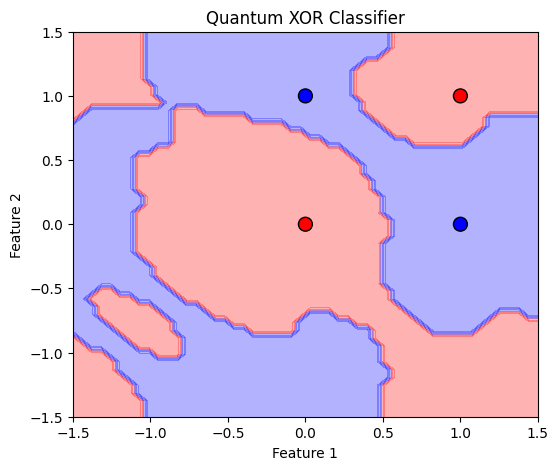

In [14]:
# Install qiskit-machine-learning if not installed
# !pip install qiskit-machine-learning qiskit

import numpy as np
from qiskit_aer import Aer
# from qiskit.utils import QuantumInstance # Deprecated
from qiskit.primitives import Sampler # Use Sampler primitive
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit_machine_learning.algorithms import VQC
from qiskit_machine_learning.optimizers import COBYLA
# from qiskit_machine_learning.datasets import XOR # Removed in newer versions

# 1️⃣ Prepare XOR dataset manually
feature_dim = 2
# Define the four XOR data points and their labels
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0]) # Labels (0 for 00 and 11, 1 for 01 and 10)
print("Features:\n", x)
print("Labels:\n", y)

# 2️⃣ Quantum Feature Map
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=1, entanglement='linear')

# 3️⃣ Variational Circuit (Ansatz)
ansatz = TwoLocal(num_qubits=feature_dim, rotation_blocks=['ry', 'rz'], entanglement_blocks='cz', reps=1)

# 4️⃣ Quantum Instance - Replaced by Sampler primitive
# backend = Aer.get_backend('aer_simulator') # No longer directly used for Sampler
sampler = Sampler() # Initialize Sampler

# 5️⃣ Variational Quantum Classifier - Update to use sampler
vqc = VQC(feature_map=feature_map,
          ansatz=ansatz,
          optimizer=COBYLA(maxiter=100),
          sampler=sampler) # Use sampler instead of quantum_instance

# 6️⃣ Train the model
vqc.fit(x, y)

# 7️⃣ Make predictions
predictions = vqc.predict(x)
print("Predictions:", predictions)
print("Actual labels:", y)

# 8️⃣ Optional: visualize decision boundary
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create a grid
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 50),
                     np.linspace(-1.5, 1.5, 50))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_pred = vqc.predict(grid)
grid_pred = grid_pred.reshape(xx.shape)

# Plot
plt.figure(figsize=(6,5))
plt.contourf(xx, yy, grid_pred, alpha=0.3, cmap=ListedColormap(['red', 'blue']))
plt.scatter(x[:,0], x[:,1], c=y, s=100, edgecolors='k', cmap=ListedColormap(['red','blue']))
plt.title("Quantum XOR Classifier")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()